In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("3.10_non_linear.csv")
df.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [3]:
def generate_degrees(source_data: list, n: int):
    return np.array([
        source_data**i for i in range(1, n+1)
    ]).T

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [37]:
degree = 8
X = generate_degrees(df.x_train, degree)
X.shape

(50, 8)

In [38]:
y = df.y_train.values
y.shape

(50,)

In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((40, 8), (10, 8), (40,), (10,))

In [40]:
model = Ridge(alpha=0).fit(X_train, y_train)

/home/hik0/mount/500_gb/data_science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.9779e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [41]:
y_pred = model.predict(X_valid)
y_pred.shape

(10,)

In [42]:
y_pred_train = model.predict(X_train)
y_pred_train.shape

(40,)

In [43]:
print(
    f"Accuracy valid: {mean_squared_error(y_valid, y_pred):.3f}\n"
    f"Accuracy train: {mean_squared_error(y_train, y_pred_train):.3f}\n"
)

Accuracy valid: 0.119
Accuracy train: 0.052



In [52]:
degree = 12
X = generate_degrees(df.x_train, degree)
y = df.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0.01).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print(
    f"Accuracy valid: {mean_squared_error(y_valid, y_pred):.3f}\n"
    f"Accuracy train: {mean_squared_error(y_train, y_pred_train):.3f}\n"
)

Accuracy valid: 0.077
Accuracy train: 0.058



/home/hik0/mount/500_gb/data_science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=5.78919e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [58]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm
from matplotlib import pyplot as plt

%matplotlib inline

In [74]:
def train_polynomial(data, degree):
    """Generate dataset and train model"""
    X = generate_degrees(data["x_train"], degree)
    y = data["y_train"]
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    error_train = mean_squared_error(y_train, y_pred_train)
    error_valid = mean_squared_error(y_valid, y_pred)
    print(f"Degree: {degree}, Error valid: {error_valid:.3f}, Error train: {error_train:.3f}")
    order_test = np.argsort(X_valid[:,0])
    plt.scatter(X_valid[:,0], y_valid)

    x_linspace = np.linspace(data["x_train"].min(), data["x_train"].max(), 100)
    y_linspace = model.predict(generate_degrees(x_linspace, degree))
    
    print(f"|w| = {norm(model.coef_):.2f}")
    plt.plot(x_linspace, y_linspace, alpha=0.5, color="g")
    
    plt.show()
    return error_valid, error_train, norm(model.coef_)


In [75]:
degrees = []
valid_errors = []
train_errors = []
w_norm = []


Degree: 3, Error valid: 0.051, Error train: 0.077
|w| = 2.19


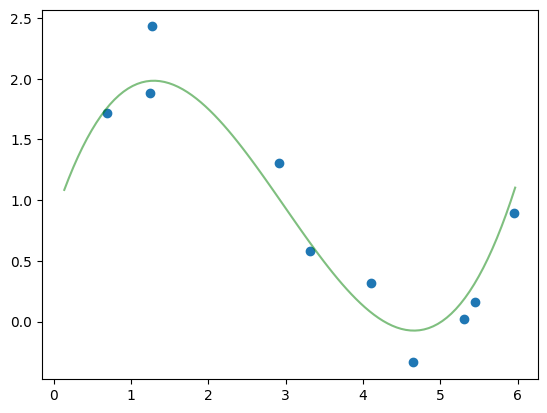

In [76]:
degree = 3

error_valid, error_train, coef_norm = train_polynomial(df, degree)
degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Degree: 5, Error valid: 0.063, Error train: 0.069
|w| = 3.31


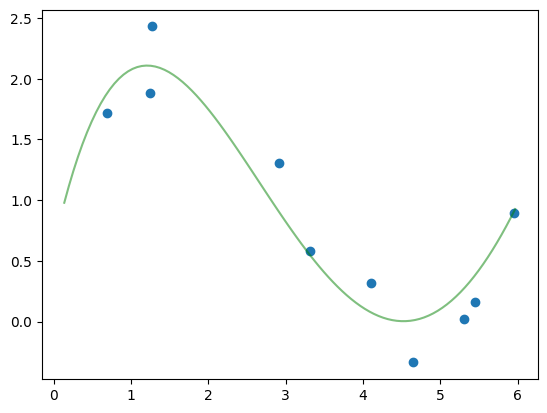

In [77]:
degree = 5

error_valid, error_train, coef_norm = train_polynomial(df, degree)
degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Degree: 10, Error valid: 0.122, Error train: 0.052
|w| = 120.14


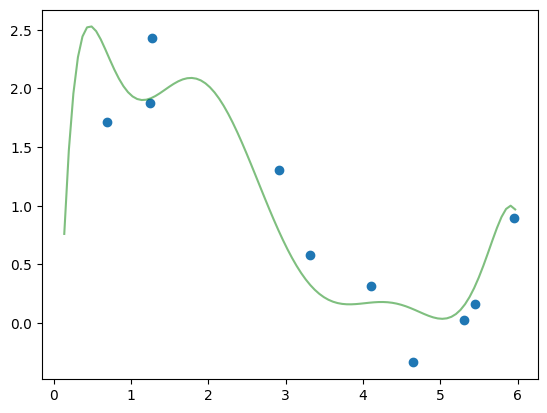

In [78]:
degree = 10

error_valid, error_train, coef_norm = train_polynomial(df, degree)
degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

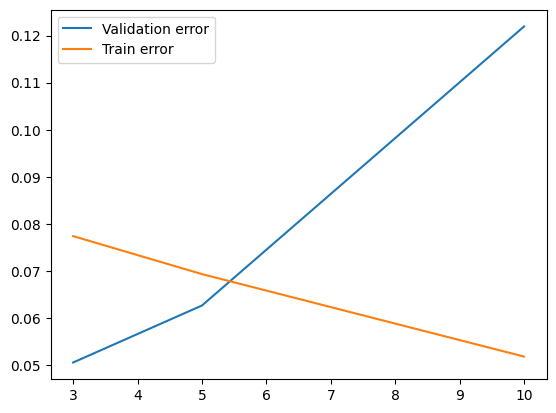

In [80]:
plt.plot(degrees, valid_errors)
plt.plot(degrees, train_errors)
plt.legend(("Validation error", "Train error"))
plt.show()

## Home work

In [81]:
from numpy.linalg import inv

In [123]:
degree = 8
X = generate_degrees(df["x_train"], degree)
y = df["y_train"].values
alpha = 0.8
w = (
    inv(
        X.T.dot(X) + alpha*np.eye(degree)
    )
    .dot(X.T)
    .dot(y)
)

In [124]:
from sklearn.linear_model import Ridge, Lasso

In [125]:
ridge = Ridge(alpha=alpha).fit(X, y)
w_ridge = ridge.coef_

In [126]:
print(w)
print(w_ridge)
np.array([w, w_ridge]).reshape(-1, 2)

[ 1.51945530e+00  5.15154358e-01 -1.63106316e-01 -3.85994709e-01
  1.97020496e-01 -3.50333016e-02  2.36527303e-03 -3.01951071e-05]
[ 5.05133950e-01  3.50113358e-01 -1.03077119e-04 -2.30029369e-01
  6.99603891e-02 -6.86910241e-04 -1.76964210e-03  1.58301479e-04]


array([[ 1.51945530e+00,  5.15154358e-01],
       [-1.63106316e-01, -3.85994709e-01],
       [ 1.97020496e-01, -3.50333016e-02],
       [ 2.36527303e-03, -3.01951071e-05],
       [ 5.05133950e-01,  3.50113358e-01],
       [-1.03077119e-04, -2.30029369e-01],
       [ 6.99603891e-02, -6.86910241e-04],
       [-1.76964210e-03,  1.58301479e-04]])

---


In [170]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=0.01)
model_linear = Ridge(alpha=0.0)

degree = 10

X = generate_degrees(df.x_train, degree)
y = df.y_train.values

In [171]:
model_ridge.fit(X, y)
model_linear.fit(X, y)

/home/hik0/mount/500_gb/data_science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=5.4898e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/hik0/mount/500_gb/data_science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.26834e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.0)

In [172]:
x_linspace = np.linspace(df["x_train"].min(), df["x_train"].max(), 100)
y_linspace_linear = model_linear.predict(generate_degrees(x_linspace, degree))
y_linspace_ridge = model_ridge.predict(generate_degrees(x_linspace, degree))
    

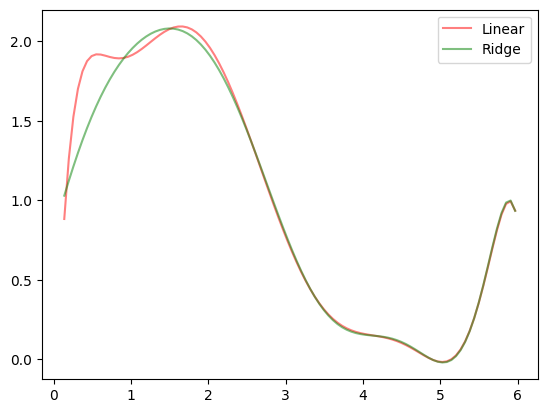

In [173]:
plt.plot(x_linspace, y_linspace_linear, alpha=0.5, color="r")
plt.plot(x_linspace, y_linspace_ridge, alpha=0.5, color="g")
plt.legend(("Linear", "Ridge"))
plt.show()

In [174]:
print(f"Linear ||w||: {norm(model_linear.coef_):.3f}")
print(f"Ridge ||w||: {norm(model_ridge.coef_):.3f}")

Linear ||w||: 72.265
Ridge ||w||: 1.943


In [197]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape, X_valid.shape)

(40, 10) (10, 10)


In [198]:
from sklearn.metrics import root_mean_squared_error

In [202]:
alphas = [0.0, 0.1, 0.15, 0.35, 0.5, 0.8, 1.0]

best_alpha = alphas[0]
best_rmse = np.infty

for alpha in alphas:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train, y_train)
    y_pred = model_ridge.predict(X_valid)
    error = mean_squared_error(y_valid, y_pred)
    if error < best_rmse:
        best_alpha = alpha
        best_rmse = error
    print(f"alpha: {alpha},\tmse: {error:.4f}")

print(f"Best alpha: {best_alpha}, mse: {best_rmse:.3f}")

alpha: 0.0,	mse: 0.1219
alpha: 0.1,	mse: 0.0827
alpha: 0.15,	mse: 0.0840
alpha: 0.35,	mse: 0.0872
alpha: 0.5,	mse: 0.0887
alpha: 0.8,	mse: 0.0907
alpha: 1.0,	mse: 0.0916
Best alpha: 0.1, mse: 0.083


/home/hik0/mount/500_gb/data_science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.74758e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/hik0/mount/500_gb/data_science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.68388e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/hik0/mount/500_gb/data_science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.12076e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/hik0/mount/500_gb/data_science/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.66817e-17): result may not be accurate.
  return linalg.solve(A, 

---
## Gradient
---

In [204]:
X = np.array([[5, 25], [2, 10]])
X

array([[ 5, 25],
       [ 2, 10]])

In [205]:
inv(X)

LinAlgError: Singular matrix

In [206]:
from sklearn.linear_model import SGDRegressor
from scipy.spatial import distance

In [207]:
df = pd.read_csv("3.10_non_linear.csv")
df.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [231]:
df = df[(df.x_train > 1) & (df.x_train < 5)].copy()

X = df["x_train"].values.reshape(-1, 1)
y = df["y_train"].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

df.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


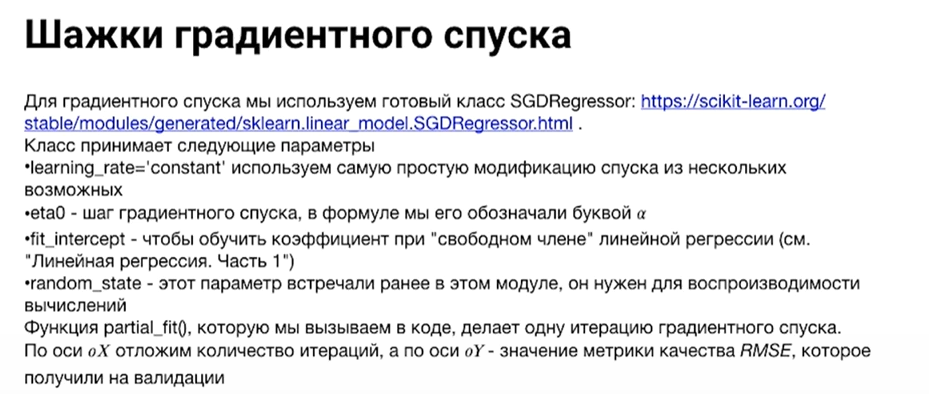

Stopped at 110 step with error: 0.150


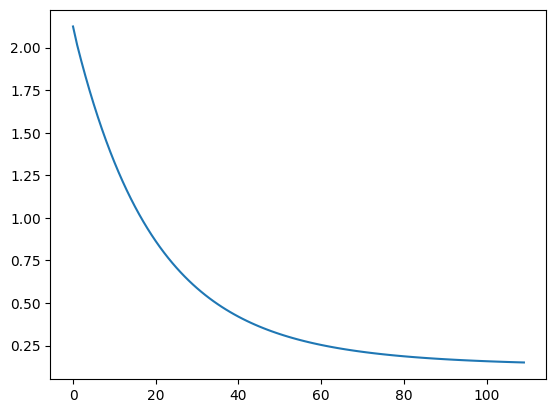

In [236]:
sgd_regressor = SGDRegressor(learning_rate="constant", eta0=0.01, fit_intercept=True, random_state=42)
w_current, epsilon = np.random.random(2), 0.001
weight_evolution = []
mse_evolution = []

for step in range(800):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(
        distance.euclidean(w_current, sgd_regressor.coef_)
    )
    if weight_evolution[-1] < epsilon:
        print(f"Stopped at {step} step with error: {mean_squared_error(y_valid, sgd_regressor.predict(X_valid)):.3f}")
        break
    mse_evolution.append(
        mean_squared_error(y_valid, sgd_regressor.predict(X_valid))
    )
    w_current = sgd_regressor.coef_.copy()
plt.plot(range(step), mse_evolution)
plt.show()

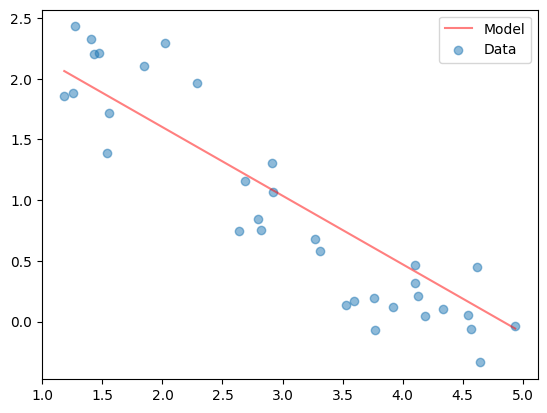

In [238]:
x_linspace = np.linspace(df["x_train"].min(), df["x_train"].max(), 100)
y_linspace_sgd = sgd_regressor.predict(x_linspace.reshape(-1, 1))

plt.plot(x_linspace, y_linspace_sgd, color="r", alpha=0.5)
plt.scatter(df.x_train, df.y_train, alpha=0.5)
plt.legend(("Model", "Data"))

---
### Мат. реализация градиентного спуска

In [239]:
df = pd.read_csv("3.10_non_linear.csv")
df = df[(df.x_train > 1) & (df.x_train < 5)].copy()
df.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


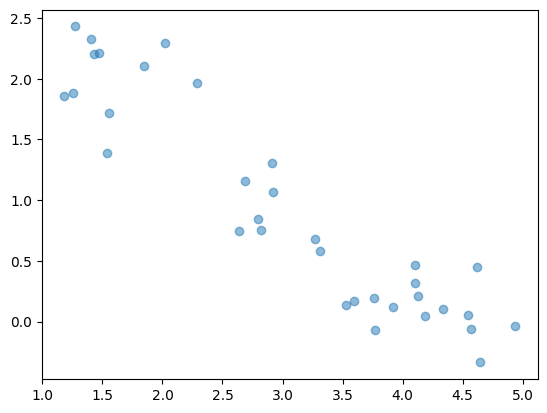

In [240]:
plt.scatter(df.x_train, df.y_train, alpha=0.5)
plt.show()

In [372]:
def gradient(X, y, w, alpha) -> np.array:
    n = X.shape[0]
    y_pred = X.dot(w)
    error = y-y_pred
    grad = np.multiply(X, error+alpha*norm(w)).sum(axis=0)*(-1.0)*2.0 / n
    return grad, error

In [324]:
def eval_w_next(X, y, eta, w_current, alpha):
    grad, error = gradient(X, y, w_current, alpha)
    w_next = w_current - eta*grad.reshape(-1, 1)
    weight_evolution = distance.euclidean(w_current.T[0], w_next.T[0])
    return w_next, weight_evolution, grad

In [342]:
def gradient_descent(X, y, eta=0.01, epsilon=0.001, alpha=0):
    m = X.shape[1]
    w = np.array([0.8145994 , 0.96308809]).reshape(-1, 1) #np.random.random(m).reshape(-1, 1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w, alpha)
    step = 0
    while weight_evolution > epsilon:
        w = w_next        
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w, alpha)
        step += 1
        if step % 100 == 0:
            print(f"step: {step}, |w-w_next|= {weight_evolution:.5f}, grad={grad}")
    return w


In [347]:
from sklearn.metrics import r2_score

In [379]:
X = df.x_train.values.reshape(-1, 1)
n = X.shape[0]
X = np.hstack([
    np.ones(n).reshape(-1, 1),
    X
])
y = df.y_train.values.reshape(-1, 1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)


w_1 = gradient_descent(X_train, y_train, eta=0.01, alpha=0)
y_pred = X_valid.dot(w_1)
r2_1 = r2_score(y_valid, y_pred)
print(f"Without regularization\nError: {r2_1:.3f}")
w_2 = gradient_descent(X_train, y_train, eta=0.01, alpha=0.03)
y_pred = X_valid.dot(w_2)
r2_2 = r2_score(y_valid, y_pred)
print(f"With regularization\nError: {r2_2:.3f}")

step: 100, |w-w_next|= 0.00394, grad=[-0.37915255  0.10532315]
step: 200, |w-w_next|= 0.00321, grad=[-0.30921451  0.08589536]
step: 300, |w-w_next|= 0.00262, grad=[-0.25217716  0.0700512 ]
step: 400, |w-w_next|= 0.00213, grad=[-0.20566085  0.05712964]
step: 500, |w-w_next|= 0.00174, grad=[-0.16772489  0.04659157]
step: 600, |w-w_next|= 0.00142, grad=[-0.13678655  0.03799734]
step: 700, |w-w_next|= 0.00116, grad=[-0.11155506  0.0309884 ]
Without regularization
Error: 0.739
step: 100, |w-w_next|= 0.00398, grad=[-0.38473707  0.10356855]
step: 200, |w-w_next|= 0.00327, grad=[-0.31561377  0.08494533]
step: 300, |w-w_next|= 0.00268, grad=[-0.25891254  0.06967977]
step: 400, |w-w_next|= 0.00220, grad=[-0.21239922  0.05715995]
step: 500, |w-w_next|= 0.00180, grad=[-0.17424258  0.0468905 ]
step: 600, |w-w_next|= 0.00148, grad=[-0.14294095  0.03846644]
step: 700, |w-w_next|= 0.00121, grad=[-0.11726265  0.03155597]
With regularization
Error: 0.765


In [344]:
np.random.random(X.shape[1])

array([0.25206611, 0.61944825])

In [371]:
(np.array([[5, 2],
         [3, 4]])**2).sum()

54

In [381]:
norm(np.array([4, 3]))

5.0